## Introduction to Artificial Intelligence 
### Program: Photo recognition && return accuracy, name, calorie 
#### TEAM #09
#### NAME: Kang Harim(20), Yun Jiin(20)

In [2]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.1.1
    Uninstalling pip-22.1.1:
      Successfully uninstalled pip-22.1.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install flickrapi

Note: you may need to restart the kernel to use updated packages.


In [4]:
from flickrapi import FlickrAPI
from urllib.request import urlretrieve
from pprint import pprint
import os, time, sys

#AP key
key="f80929de7d2ad863fe7a549666f51ac7"
secret="050a4836eedd6ab7"
wait_time=1

def main():
#     go_download('초밥','sushi')
#     go_download('샐러드','salad')
#     go_download('피자','pizza')
#     go_download('떡볶이','tteokbokki')
#     go_download('김밥','kimbap')
#     go_download('짜장면','jjajangmyeon')
#     go_download('햄버거','hamburger')
#     go_download('파스타','pasta')
    go_download('돈까스','tonkatsu')
    
def go_download(keyword, dir):
    savedir="./image/"+dir
    if not os.path.exists(savedir):
        os.mkdir(savedir)
    flickr=FlickrAPI(key,secret,format='parsed-json')
    res=flickr.photos.search(
    text=keyword,
    per_page=300,
    media='photos',
    sort = "relevance",
        safe_search = 1,
        extras = 'url_q, license')
    
    photos = res['photos']
    pprint(photos)
    
    try:
        for i, photo in enumerate(photos['photo']):
            url_q = photo['url_q']
            filepath = savedir + '/' + photo['id'] + ".jpg"
            if os.path.exists(filepath): continue
            print(str(i+1) + ":download=", url_q)
            urlretrieve(url_q,filepath)
            time.sleep(wait_time)
    except:
        import traceback
        traceback.print_exc()
    
if __name__ == '__main__':
    main()
        

IndentationError: expected an indented block (2170600776.py, line 22)

In [1]:
import numpy as np
from PIL import Image
import os, glob, random

outfile = "image/photos.npz"
max_photo = 200
photo_size = 128
x = []
y = []

def main():
    glob_files("./image/sushi",0)
    glob_files("./image/salad",1)
    glob_files("./image/pizza",2)
    glob_files("./image/tteokbokki",3)
    glob_files("./image/kimbap",4)
    glob_files("./image/jjajang",5)
    glob_files("./image/hamburger",6)
    glob_files("./image/pasta",7)
    glob_files("./image/tonkatsu",8)
    
    np.savez(outfile, x=x, y=y)
    print("저장했습니다.:" + outfile, len(x))
    
def glob_files(path, label):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    
    num = 0 
    for f in files:
        if num >= max_photo: break
        num += 1
        
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((photo_size, photo_size))
        img = np.asarray(img)
        x.append(img)
        y.append(label)

if __name__ == '__main__':
    main()

OSError: image file is truncated (36 bytes not processed)

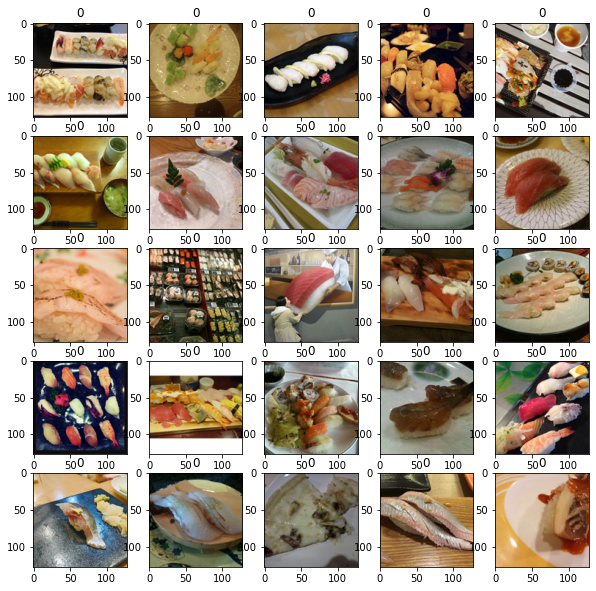

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# 사진 데이터 읽어 들이기
photos=np.load('image/photos.npz')
x=photos['x']
y=photos['y']
idx=0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title(y[i+idx])
    plt.imshow(x[i+idx])
plt.show()

In [102]:
# !pip install keras
# !pip install kears.models
# !pip install kears.layers
# !pip install kears.optimizers

!pip install tensorflow

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop

# CNN 모델 정의하기
def def_model(in_shape, nb_classes):
    model=Sequential()
    model.add(Conv2D(32,
                    kernel_size=(3,3),
                    activation='relu',
                    input_shape=in_shape))
    #model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    
    #model.add(Conv2D(256,(3,3),activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(nb_classes,activation='softmax'))
    return model

In [5]:
# compile & return model
def get_model(in_shape, nb_classes):
    model=def_model(in_shape,nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model

In [34]:
# import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping

im_rows=128
im_cols=128
im_color=3
in_shape=(im_rows,im_cols,im_color)
nb_classes=9

photos=np.load('image/photos.npz')
x=photos['x']
y=photos['y']

x=x.reshape(-1,im_rows,im_cols,im_color)
x=x.astype('float32')/255
y=keras.utils.np_utils.to_categorical(y.astype('int32'),nb_classes)
print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test=train_test_split(
x,y,train_size=0.8)

# CNN model 만들기
model=get_model(in_shape,nb_classes)

es = EarlyStopping(monitor='val_accuracy', mode='max',min_delta=1, verbose=1, patience=15,restore_best_weights=True)
mc = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', mode='max', save_best_only=True)

hist=model.fit(x_train,y_train,
               batch_size=32,
               epochs=50,
               verbose=1,
               validation_data=(x_test,y_test),
               callbacks=[es,mc]
              )

score=model.evaluate(x_test, y_test, verbose=1)
print('정답률=',score[1], '손실률=',score[0])

(1504, 128, 128, 3)
(1504, 9)
Epoch 1/50
38/38 [==============================] - 24s 591ms/step - loss: 3.4033 - accuracy: 0.1962 - val_loss: 2.1076 - val_accuracy: 0.2159
Epoch 2/50
38/38 [==============================] - 23s 598ms/step - loss: 1.9515 - accuracy: 0.2510 - val_loss: 2.0363 - val_accuracy: 0.2691
Epoch 3/50
38/38 [==============================] - 20s 529ms/step - loss: 1.8311 - accuracy: 0.3184 - val_loss: 1.9137 - val_accuracy: 0.3223
Epoch 4/50
38/38 [==============================] - 21s 555ms/step - loss: 1.6785 - accuracy: 0.3948 - val_loss: 1.8515 - val_accuracy: 0.3289
Epoch 5/50
38/38 [==============================] - 25s 651ms/step - loss: 1.4849 - accuracy: 0.4830 - val_loss: 1.7906 - val_accuracy: 0.3555
Epoch 6/50
38/38 [==============================] - 20s 517ms/step - loss: 1.2739 - accuracy: 0.5636 - val_loss: 1.8063 - val_accuracy: 0.3422
Epoch 7/50
38/38 [==============================] - 20s 520ms/step - loss: 1.0566 - accuracy: 0.6409 - val_loss:

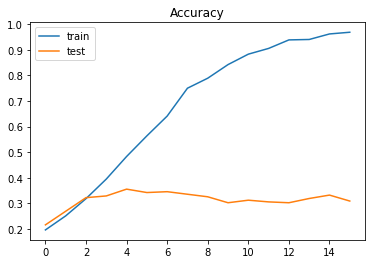

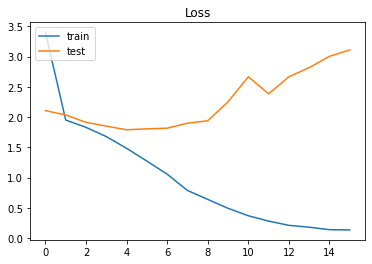

In [38]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

model.save_weights('./image/photos-model-light.hdf5')

In [52]:
!pip install opencv-python

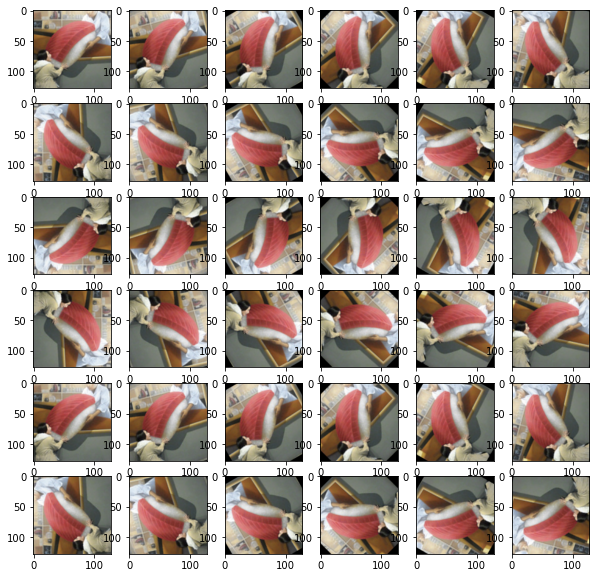

In [29]:
import matplotlib.pyplot as plt
import cv2

photos = np.load('image/photos.npz')
x = photos['x']
img = x[12]

plt.figure(figsize= (10,10))
for i in range(36):
    plt.subplot(6,6,i+1)

    center = (im_rows/2,im_cols/2)
    angle = i * 15
    scale = 1.2
    mtx = cv2.getRotationMatrix2D(center, angle, scale)
    img2 = cv2.warpAffine(img, mtx, (0,0))
    
    plt.imshow(img2)
plt.show()

In [30]:
import cv2

x_train, x_test, y_train, y_test = train_test_split( x, y, train_size=0.8)

x_new = []
y_new = []

for i, xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30, 30, 5):
        center = (im_rows/2,im_cols/2)
        mtx = cv2.getRotationMatrix2D(center, ang, 1.0)
        xi2 = cv2.warpAffine(xi, mtx, (0, 0))
        x_new.append(xi2)
        y_new.append(yi)
        
        xi3 = cv2.flip(xi2, 1)

print('수량 늘리기 전 = ', len(y_train) )
x_train = np.array(x_new)
y_train = np.array(y_new)
print('수량을 늘린 후 = ', len(y_train))

model = get_model(in_shape, nb_classes)

수량 늘리기 전 =  1203
수량을 늘린 후 =  14436


(150, 150)
(128, 128)


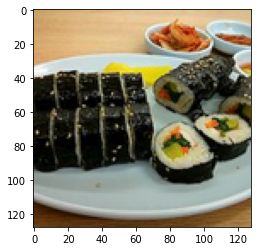

1/1 [==============================] - 0s 136ms/step
이 사진은  김밥 로(으로), 칼로리는  485 kcal 입니다.
정확도는  93 % 입니다.


In [37]:
# import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

im_rows = 128
im_cols = 128
im_color = 3
in_shape = (im_rows, im_cols, im_color)
nb_classes = 9
    
LABELS = ["초밥", "샐러드", "피자", "떡볶이", "김밥", "짜장면", "햄버거", "파스타", "돈까스"]

CALORIES = [588, 118, 266, 300, 485, 864, 294, 131, 574]

model = get_model(in_shape, nb_classes)
# model.load_weights('./image/photos-model-light.hdf5')
model.load_weights('./best_model.hdf5')

def check_photo(path):
    img = Image.open(path)
    img = img.convert("RGB")
    print(img.size)
    img = img.resize((im_cols, im_rows))
    print(img.size)
    plt.imshow(img)
    plt.show()
    
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color) 
    x = x/ 255
    
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx]*100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    
    print("이 사진은 ", LABELS[idx], "로(으로), 칼로리는 ", CALORIES[idx], "kcal 입니다.")
    print("정확도는 ", per , "% 입니다.")
    
if __name__ == '__main__':
    check_photo_str('./image/kimbap/9567169135.jpg')